## 1

We look these values up from pp. 136-143

a. 42 ksi

b. 48 ksi

c. 68 ksi

d. 70 ksi

e. 73 ksi

f. 75 ksi

## 2

These values we get from the charts on pp. 111-121

a. Room Temperature: $133 \text{ ksi}\sqrt{\text{in.}}$ -65: $133 \text{ ksi}\sqrt{\text{in.}}$

b. Room Temperature: $140 \text{ ksi}\sqrt{\text{in.}}$ -65: $140 \text{ ksi}\sqrt{\text{in.}}$

c. Room Temperature: $43 \text{ ksi}\sqrt{\text{in.}}$ -65: $35 \text{ ksi}\sqrt{\text{in.}}$

d. Room Temperature: $60 \text{ ksi}\sqrt{\text{in.}}$ -65: $47 \text{ ksi}\sqrt{\text{in.}}$

e. Room Temperature: $30 \text{ ksi}\sqrt{\text{in.}}$ -65: $24 \text{ ksi}\sqrt{\text{in.}}$

f. Room Temperature: $34 \text{ ksi}\sqrt{\text{in.}}$ -65: $27 \text{ ksi}\sqrt{\text{in.}}$

## 3

We now use the Fedderson approach to plot the residual strength as a function of crack length

a. For 2024-T351, we find

In [1]:
# load libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

#interpolation library to go between discrete points
from scipy import interpolate
#optimization library
from scipy.optimize import minimize

C:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We can now generate a preliminary plot for these conditions

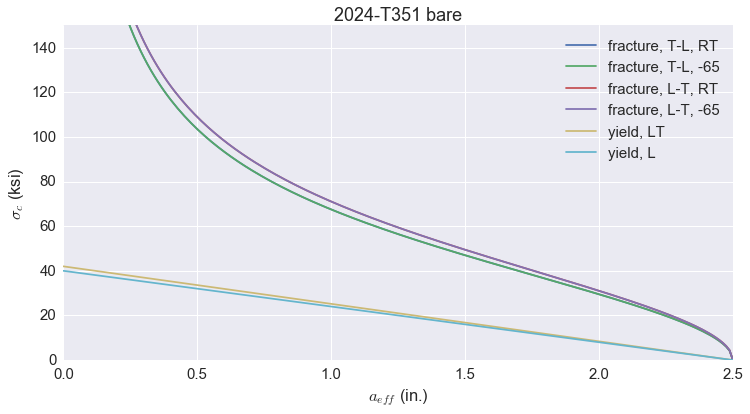

In [2]:
#panel properties
W = 5.0 #in

#2024-T351
Kc_TL_RT = 133.0 #ksi sqrt(in)
Kc_TL_65 = 133.0 #ksi sqrt(in)
Kc_LT_RT = 140.0 #ksi sqrt(in)
Kc_LT_65 = 140.0 #ksi sqrt(in)

s_ys_LT = 42.0 #ksi
s_ys_L = 40.0 #ksi

#crack length array
a = np.linspace(0,W/2,200)

#fracture criteria
sc_f_TL_RT = Kc_TL_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_TL_65 = Kc_TL_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_RT = Kc_LT_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_65 = Kc_LT_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))

#net section yield criteria
sc_y_LT = s_ys_LT*(W-2*a)/W
sc_y_L = s_ys_L*(W-2*a)/W

#preliminary plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f_TL_RT,label='fracture, T-L, RT')
plt.plot(a,sc_f_TL_65,label='fracture, T-L, -65')
plt.plot(a,sc_f_LT_RT,label='fracture, L-T, RT')
plt.plot(a,sc_f_LT_65,label='fracture, L-T, -65')
plt.plot(a,sc_y_LT,label='yield, LT')
plt.plot(a,sc_y_L,label='yield, L')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,150])
plt.title('2024-T351 bare')

We can see that in this case, for any size of crack the panel will fail in yield, so the Fedderson approach is no different from any other. The panel will always fail due to net section yield (under the same stress in either grain orientation and temperature condition).

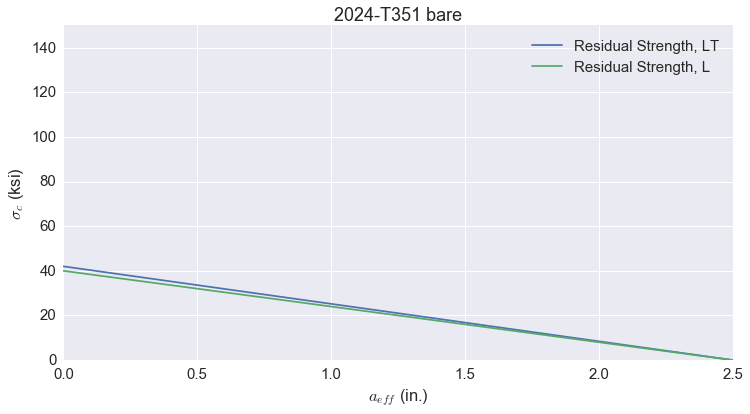

In [3]:
#preliminary plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_y_LT,label='Residual Strength, LT')
plt.plot(a,sc_y_L,label='Residual Strength, L')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,150])
plt.title('2024-T351 bare')

b. For the panel in part b we generate a preliminary plot

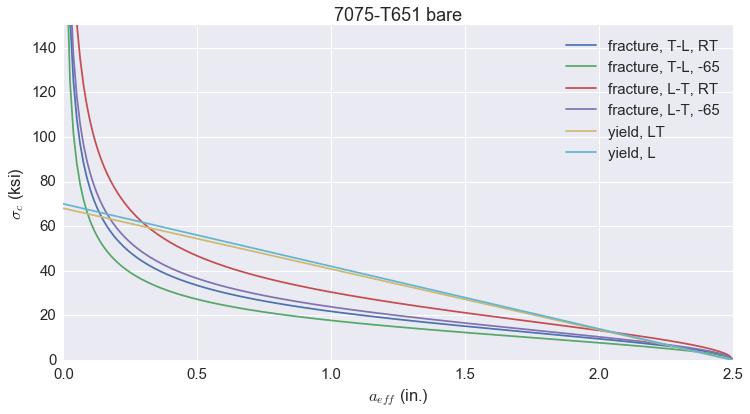

In [4]:
#panel properties
W = 5.0 #in

#2024-T351
Kc_TL_RT = 43.0 #ksi sqrt(in)
Kc_TL_65 = 35.0 #ksi sqrt(in)
Kc_LT_RT = 60.0 #ksi sqrt(in)
Kc_LT_65 = 47.0 #ksi sqrt(in)

s_ys_LT = 68.0 #ksi
s_ys_L = 70.0 #ksi

#crack length array
a = np.linspace(0,W/2,200)

#fracture criteria
sc_f_TL_RT = Kc_TL_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_TL_65 = Kc_TL_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_RT = Kc_LT_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_65 = Kc_LT_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))

#net section yield criteria
sc_y_LT = s_ys_LT*(W-2*a)/W
sc_y_L = s_ys_L*(W-2*a)/W

#preliminary plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f_TL_RT,label='fracture, T-L, RT')
plt.plot(a,sc_f_TL_65,label='fracture, T-L, -65')
plt.plot(a,sc_f_LT_RT,label='fracture, L-T, RT')
plt.plot(a,sc_f_LT_65,label='fracture, L-T, -65')
plt.plot(a,sc_y_LT,label='yield, LT')
plt.plot(a,sc_y_L,label='yield, L')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,150])
plt.title('7075-T651 bare')

In this case we will need to use the Fedderson approach to plot tangent curves between the yield and fracture criteria

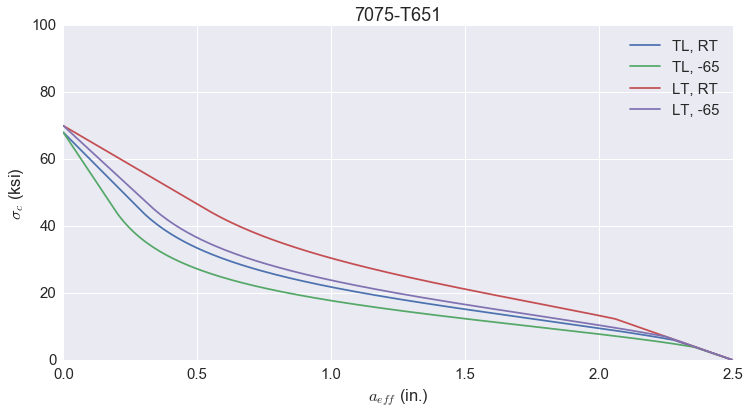

In [6]:
#interpolations of fracture condition
spl_TL_RT = interpolate.splrep(a[1:],sc_f_TL_RT[1:])
spl_TL_65 = interpolate.splrep(a[1:],sc_f_TL_65[1:])
spl_LT_RT = interpolate.splrep(a[1:],sc_f_LT_RT[1:])
spl_LT_65 = interpolate.splrep(a[1:],sc_f_LT_65[1:])
#guess point of intersection
a0 = 0.7

#objective function for optimization
def myobj(a,spl=spl_TL_RT,sc_y=sc_y_LT):
    fa = interpolate.splev(a,spl,der=0)
    fprime = interpolate.splev(a,spl,der=1)
    return (sc_y - (fa-fprime*a))**2

#optimize
res = minimize(myobj,a0,args=(spl_TL_RT,sc_y_LT[0]))
a_int_TL_RT = res.x[0]
res = minimize(myobj,a0,args=(spl_TL_65,sc_y_LT[0]))
a_int_TL_65 = res.x[0]
res = minimize(myobj,a0,args=(spl_LT_RT,sc_y_L[0]))
a_int_LT_RT = res.x[0]
res = minimize(myobj,a0,args=(spl_LT_65,sc_y_L[0]))
a_int_LT_65 = res.x[0]

#array to plot tangent line
a_tan_TL_RT = np.linspace(0,a_int_TL_RT)
a_tan_TL_65 = np.linspace(0,a_int_TL_65)
a_tan_LT_RT = np.linspace(0,a_int_LT_RT)
a_tan_LT_65 = np.linspace(0,a_int_LT_65)

#generate tangent lines
fa_TL_RT = interpolate.splev(a_int_TL_RT,spl_TL_RT,der=0)
fprime_TL_RT = interpolate.splev(a_int_TL_RT,spl_TL_RT,der=1)
fa_TL_65 = interpolate.splev(a_int_TL_65,spl_TL_65,der=0)
fprime_TL_65 = interpolate.splev(a_int_TL_65,spl_TL_65,der=1)
fa_LT_RT = interpolate.splev(a_int_LT_RT,spl_LT_RT,der=0)
fprime_LT_RT = interpolate.splev(a_int_LT_RT,spl_LT_RT,der=1)
fa_LT_65 = interpolate.splev(a_int_LT_65,spl_LT_65,der=0)
fprime_LT_65 = interpolate.splev(a_int_LT_65,spl_LT_65,der=1)

def mymin(a,a_int,fa,fprime,Kc,s_ys):
    if a < a_int:
        return fa+fprime*(a-a_int)
    else:
        return min([Kc/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W))),s_ys*(W-2*a)/W])

plt.figure(figsize=(12,6))
plt.plot(a,[mymin(i,a_int_TL_RT,fa_TL_RT,fprime_TL_RT,Kc_TL_RT,s_ys_LT) for i in a],label='TL, RT')
plt.plot(a,[mymin(i,a_int_TL_65,fa_TL_65,fprime_TL_65,Kc_TL_65,s_ys_LT) for i in a],label='TL, -65')
plt.plot(a,[mymin(i,a_int_LT_RT,fa_LT_RT,fprime_LT_RT,Kc_LT_RT,s_ys_L) for i in a],label='LT, RT')
plt.plot(a,[mymin(i,a_int_LT_65,fa_LT_65,fprime_LT_65,Kc_LT_65,s_ys_L) for i in a],label='LT, -65')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,100])
plt.title('7075-T651')

c. For part c we repeat for the values we found for 7178-T651

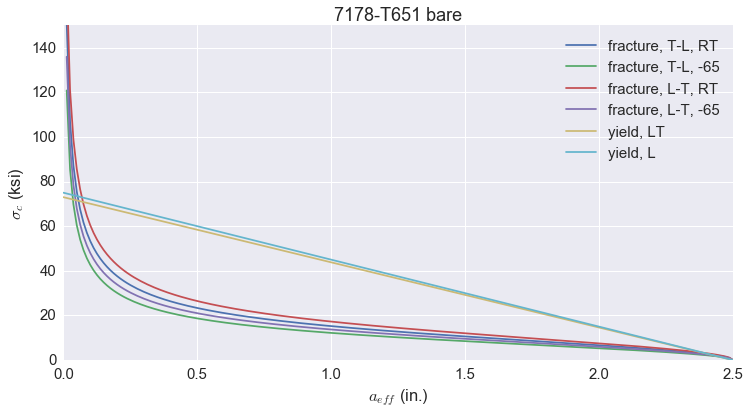

In [7]:
#panel properties
W = 5.0 #in

#2024-T351
Kc_TL_RT = 30.0 #ksi sqrt(in)
Kc_TL_65 = 24.0 #ksi sqrt(in)
Kc_LT_RT = 34.0 #ksi sqrt(in)
Kc_LT_65 = 27.0 #ksi sqrt(in)

s_ys_LT = 73.0 #ksi
s_ys_L = 75.0 #ksi

#crack length array
a = np.linspace(0,W/2,200)

#fracture criteria
sc_f_TL_RT = Kc_TL_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_TL_65 = Kc_TL_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_RT = Kc_LT_RT/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))
sc_f_LT_65 = Kc_LT_65/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))

#net section yield criteria
sc_y_LT = s_ys_LT*(W-2*a)/W
sc_y_L = s_ys_L*(W-2*a)/W

#preliminary plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f_TL_RT,label='fracture, T-L, RT')
plt.plot(a,sc_f_TL_65,label='fracture, T-L, -65')
plt.plot(a,sc_f_LT_RT,label='fracture, L-T, RT')
plt.plot(a,sc_f_LT_65,label='fracture, L-T, -65')
plt.plot(a,sc_y_LT,label='yield, LT')
plt.plot(a,sc_y_L,label='yield, L')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,150])
plt.title('7178-T651 bare')

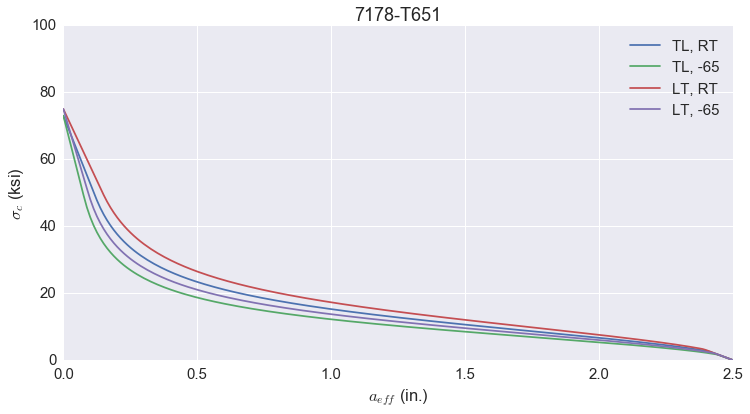

In [9]:
#interpolations of fracture condition
spl_TL_RT = interpolate.splrep(a[1:],sc_f_TL_RT[1:])
spl_TL_65 = interpolate.splrep(a[1:],sc_f_TL_65[1:])
spl_LT_RT = interpolate.splrep(a[1:],sc_f_LT_RT[1:])
spl_LT_65 = interpolate.splrep(a[1:],sc_f_LT_65[1:])
#guess point of intersection
a0 = 0.1

#objective function for optimization
def myobj(a,spl=spl_TL_RT,sc_y=sc_y_LT):
    fa = interpolate.splev(a,spl,der=0)
    fprime = interpolate.splev(a,spl,der=1)
    return (sc_y - (fa-fprime*a))**2

#optimize
res = minimize(myobj,a0,args=(spl_TL_RT,sc_y_LT[0]))
a_int_TL_RT = res.x[0]
res = minimize(myobj,a0,args=(spl_TL_65,sc_y_LT[0]))
a_int_TL_65 = res.x[0]
res = minimize(myobj,a0,args=(spl_LT_RT,sc_y_L[0]))
a_int_LT_RT = res.x[0]
res = minimize(myobj,a0,args=(spl_LT_65,sc_y_L[0]))
a_int_LT_65 = res.x[0]

#array to plot tangent line
a_tan_TL_RT = np.linspace(0,a_int_TL_RT)
a_tan_TL_65 = np.linspace(0,a_int_TL_65)
a_tan_LT_RT = np.linspace(0,a_int_LT_RT)
a_tan_LT_65 = np.linspace(0,a_int_LT_65)

#generate tangent lines
fa_TL_RT = interpolate.splev(a_int_TL_RT,spl_TL_RT,der=0)
fprime_TL_RT = interpolate.splev(a_int_TL_RT,spl_TL_RT,der=1)
fa_TL_65 = interpolate.splev(a_int_TL_65,spl_TL_65,der=0)
fprime_TL_65 = interpolate.splev(a_int_TL_65,spl_TL_65,der=1)
fa_LT_RT = interpolate.splev(a_int_LT_RT,spl_LT_RT,der=0)
fprime_LT_RT = interpolate.splev(a_int_LT_RT,spl_LT_RT,der=1)
fa_LT_65 = interpolate.splev(a_int_LT_65,spl_LT_65,der=0)
fprime_LT_65 = interpolate.splev(a_int_LT_65,spl_LT_65,der=1)

def mymin(a,a_int,fa,fprime,Kc,s_ys):
    if a < a_int:
        return fa+fprime*(a-a_int)
    else:
        return min([Kc/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W))),s_ys*(W-2*a)/W])

plt.figure(figsize=(12,6))
plt.plot(a,[mymin(i,a_int_TL_RT,fa_TL_RT,fprime_TL_RT,Kc_TL_RT,s_ys_LT) for i in a],label='TL, RT')
plt.plot(a,[mymin(i,a_int_TL_65,fa_TL_65,fprime_TL_65,Kc_TL_65,s_ys_LT) for i in a],label='TL, -65')
plt.plot(a,[mymin(i,a_int_LT_RT,fa_LT_RT,fprime_LT_RT,Kc_LT_RT,s_ys_L) for i in a],label='LT, RT')
plt.plot(a,[mymin(i,a_int_LT_65,fa_LT_65,fprime_LT_65,Kc_LT_65,s_ys_L) for i in a],label='LT, -65')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,100])
plt.title('7178-T651')

## 4 

We can find the proof load required for this case using $\sigma_c = \frac{K_c}{\sqrt{\pi a} \beta}$ with $2a = 0.2$

In [24]:
W = 8.0 #in
t = 0.4 #in.

Kc_TL_RT = 30.0 #ksi sqrt(in)
Kc_TL_65 = 24.0 #ksi sqrt(in)
Kc_LT_RT = 34.0 #ksi sqrt(in)
Kc_LT_65 = 27.0 #ksi sqrt(in)

sc_TL_RT = Kc_TL_RT/(np.sqrt(np.pi*0.1)/np.cos(np.pi*0.1/W))
sc_TL_65 = Kc_TL_65/(np.sqrt(np.pi*0.1)/np.cos(np.pi*0.1/W))
sc_LT_RT = Kc_LT_RT/(np.sqrt(np.pi*0.1)/np.cos(np.pi*0.1/W))
sc_LT_65 = Kc_LT_65/(np.sqrt(np.pi*0.1)/np.cos(np.pi*0.1/W))

#convert stress to load
print sc_TL_RT*W*t
print sc_TL_65*W*t
print sc_LT_RT*W*t
print sc_LT_65*W*t

171.143867627
136.915094102
193.963049978
154.029480865


So for the T-L grain direction at room temperature, a load of 171 k-lbs. would provide a proof test for a 0.2 inch crack in this panel. Similarly for T-L grain direction at -65, the proof load would be 137 k-lbs.

In the L-T grain direction, the proof load required is 194 k-lbs. at room temperature and 154 k-lbs. at -65.

## 5

First we plot the residual strength of the skin without stiffeners

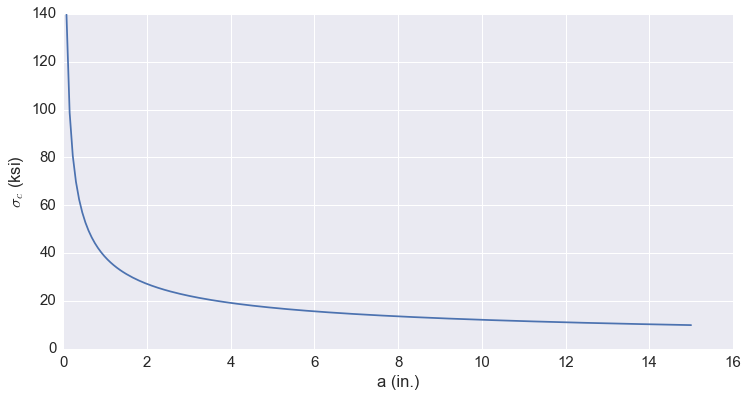

In [51]:
Kc = 68.0 #ksi sqrt(in)
b = 10.0 #inches (stiffener spacing)

#crack length array
a = np.linspace(0,1.5*b,200)

#fracture criteria
sc_f = Kc/(np.sqrt(np.pi*a))
#ignore net-section yield
#plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='skin without stiffener')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')

To find the residual strength with stiffeners we first need to find the parameter $\mu$, which will indicate which carts to use.
We find

In [52]:
t = 0.1875 #in
As = 0.3788 #in^2
Es = 23.4e3 #ksi
A = b*t #in^2
E = 11.0e3 #ksi

#parameter for charts
mu = As*Es/(As*Es+A*E)
print mu

0.300584762006


We find $\mu = 0.30$, so we use that to look up the appropriate $\beta$ and $L$ values from pp. 167-178.

(0, 80)

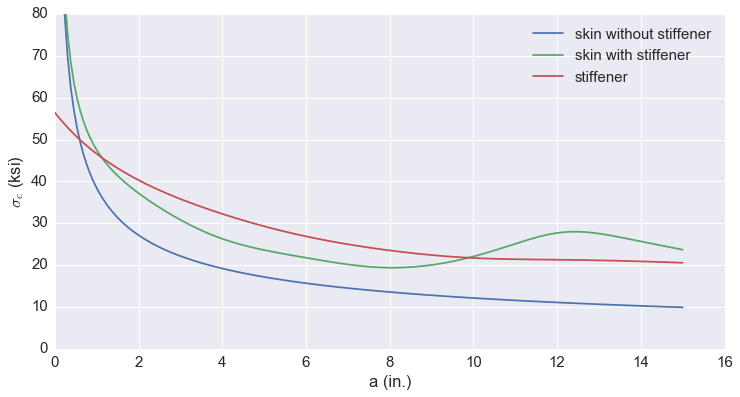

In [60]:
#beta values from chart
a_b = np.arange(0,3.2,0.2)
beta = np.array([1.0, 0.73, 0.73, 0.72, 0.70, 0.55, 0.4, 0.4, 0.45, 0.50, 0.32, 0.29, .30, 0.31, 0.38, 0.25])
L = np.array([1.0, 1.4, 1.75, 2.1, 2.4, 2.6, 2.65, 2.7, 2.8, 2.9, 2.90, 2.92, 2.94, 2.96, 2.98, 3.0])

#interpolate between data points
beta_i = interpolate.splrep(a_b*b,beta)
L_i = interpolate.splrep(a_b*b,L)

#stiffened skin
sc_f_s = Kc/(np.sqrt(np.pi*a)*interpolate.splev(a,beta_i))

#stiffener
s_ys = 120.0 #ksi
sc_st = s_ys*E/(Es*interpolate.splev(a,L_i))

#plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='skin without stiffener')
plt.plot(a,sc_f_s,label='skin with stiffener')
plt.plot(a,sc_st,label='stiffener')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,80])

The residual strength of the stiffened panel will be the minimum of the skin/stiffener residual strength

(0, 80)

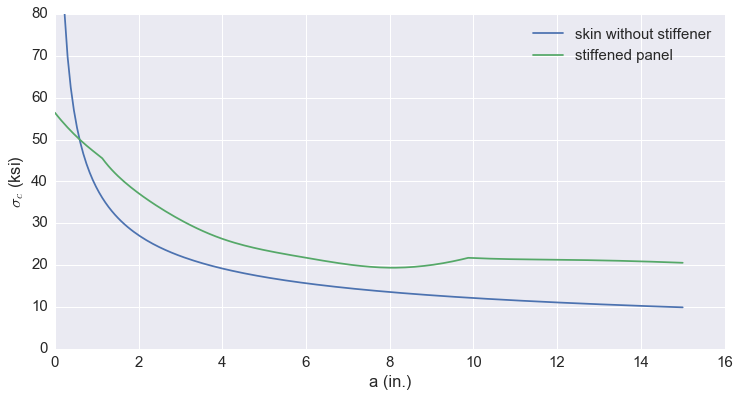

In [61]:
#plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='skin without stiffener')
plt.plot(a,[min([sc_st[i],sc_f_s[i]]) for i in range(len(a))],label='stiffened panel')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,80])

With the stiffener severed, we need to look up the new $\beta$ values from case 11 on p. 195.

(0, 80)

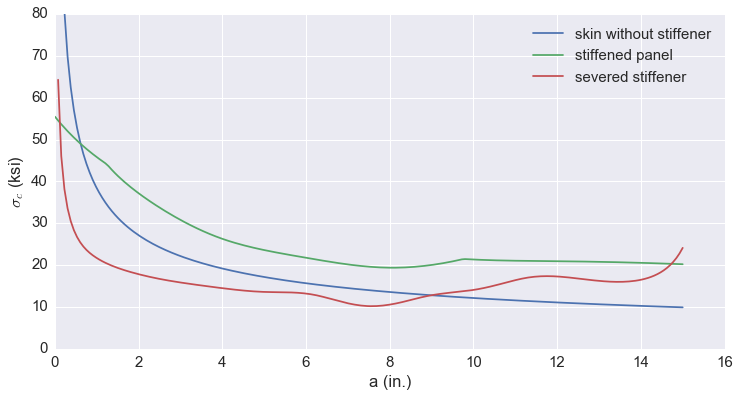

In [58]:
a_severed = np.array([.3125,.625,.9375,1.25,2.5,3.75,5.0,6.25,7.5,8.75,10.0,11.25,12.5,13.75])
beta_severed = np.array([2.0766,1.9305,1.7930,1.6874,1.4530,1.3384,1.2625,1.2002,1.374,1.0552,0.8624,0.6754,0.6462,0.6418])

#interpolate between data points
beta_i_sev = interpolate.splrep(a_severed,beta_severed)

#stiffened skin
sc_f_sev = Kc/(np.sqrt(np.pi*a)*interpolate.splev(a,beta_i_sev))

#plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='skin without stiffener')
plt.plot(a,[min([sc_st[i],sc_f_s[i]]) for i in range(len(a))],label='stiffened panel')
plt.plot(a,sc_f_sev,label='severed stiffener')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,80])